In [9]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [2]:
dataset_path = "/content/drive/MyDrive/data/7-7 dataset"

idg = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    validation_split=0.2
)

data_train = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="training",
    target_size = (224,224)
)

data_validation = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="validation",
    target_size = (224,224)

)

Found 1090 images belonging to 14 classes.
Found 268 images belonging to 14 classes.


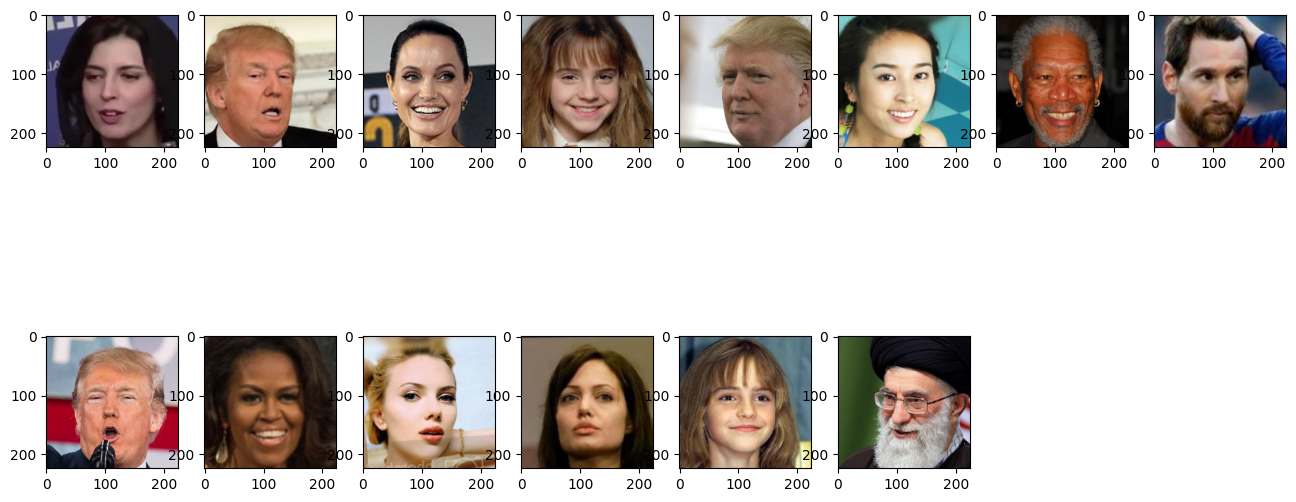

In [3]:
some_images=next(data_train)
X=some_images[0]
Y=some_images[1]

plt.figure(figsize=(16,16))
for i in range(14):
  plt.subplot(4,8,i+1)
  plt.imshow(X[i])


In [4]:
model = tf.keras.applications.vgg16.VGG16(
                                        weights="imagenet",
                                        input_shape=(224,224,3),
                                        include_top=False,
                                       )

In [5]:
my_model = tf.keras.models.Sequential([
    model,
    layers.Flatten(),
    layers.Dense(1024,activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(14,activation='softmax'),
])

In [6]:
my_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["accuracy"]
)

In [7]:
plt_model = my_model.fit(data_train, validation_data=data_validation, epochs=10)

Epoch 1/10
35/35 [==============================] - 89s 2s/step - loss: 1.5901 - accuracy: 0.5202 - val_loss: 0.6207 - val_accuracy: 0.8134
Epoch 2/10
35/35 [==============================] - 17s 488ms/step - loss: 0.4326 - accuracy: 0.8624 - val_loss: 0.4703 - val_accuracy: 0.8619
Epoch 3/10
35/35 [==============================] - 17s 493ms/step - loss: 0.1768 - accuracy: 0.9477 - val_loss: 0.4084 - val_accuracy: 0.8769
Epoch 4/10
35/35 [==============================] - 17s 494ms/step - loss: 0.0782 - accuracy: 0.9761 - val_loss: 0.2250 - val_accuracy: 0.9328
Epoch 5/10
35/35 [==============================] - 17s 473ms/step - loss: 0.0782 - accuracy: 0.9780 - val_loss: 0.3712 - val_accuracy: 0.8806
Epoch 6/10
35/35 [==============================] - 17s 494ms/step - loss: 0.0409 - accuracy: 0.9890 - val_loss: 0.1849 - val_accuracy: 0.9478
Epoch 7/10
35/35 [==============================] - 17s 480ms/step - loss: 0.0579 - accuracy: 0.9789 - val_loss: 0.2350 - val_accuracy: 0.9291
Ep

In [8]:
my_model.save("7_7_faces.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
import seaborn as sns

In [15]:
import cv2

img = cv2.imread("test2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img = img / 255.0
img = img.reshape(1, 224, 224, 3)

output = my_model.predict(img)
labels = list(data_train.class_indices.keys())
print('class label', labels[np.argmax(output)])

1/1 [==============================] - 0s 19ms/step
class label Barak_Obama
